$$ \huge{Домашнее \space задание \space № \space 1}$$


$$\large{Федоров \space Павел\space Сергеевич \space 172}$$

$$Прикладная \space статистика \space в \space машинном \space обучении$$

## Задание 1

1. Выпишите функцию правдоподобия $L(\mu, \sigma^2)$ для приведенных результатов. Постройте двумерный контурный график функции правдоподобия для коэффициентов доверия 10%, 50%, 68%, 90%.

**https://newonlinecourses.science.psu.edu/stat414/node/191/**

$$f(x_i;\mu,\sigma^2)=\dfrac{1}{\sigma\sqrt{2\pi}}\text{exp}\left[-\dfrac{(x_i-\mu)^2}{2\sigma^2}\right] \rightarrow$$

$$L(\mu,\sigma^2)=\prod\limits_{i=1}^n f(x_i;\mu,\sigma^2)=\sigma^{-n}(2\pi)^{-n/2}\text{exp}\left[-\dfrac{1}{2\sigma^2}\sum\limits_{i=1}^n(x_i-\mu)^2\right] \rightarrow$$

$$L(\mu, \sigma^2) = \frac{1}{({2\pi\sigma^2})^{5}} \text{exp}\left[-\dfrac{1}{2\sigma^2}\sum\limits_{i=1}^{10}(x_i-\mu)^2\right]$$

In [1]:
from scipy.stats import t, norm, chi2
import matplotlib.pyplot as plt
import numpy as np

x = np.array([0.88, 1.07, 1.27, 1.54, 1.91, 2.27, 3.84, 4.50, 4.64, 9.41])

In [2]:
mu_fit, sigma_fit = norm.fit(x)
log_likelihood_max = norm.logpdf(x, loc=mu_fit, scale=sigma_fit).sum()

In [3]:
mu_s = np.linspace(mu_fit / 2, 3 * mu_fit / 2, 200)
sigmas = np.linspace(sigma_fit ** 2 / 2, 2 * sigma_fit ** 2, 200)
mu_s, sigmas = np.meshgrid(mu_s, sigmas)

In [4]:
%%time
log_likelihoods = []
for mu, sigma in zip(mu_s.ravel(), sigmas.ravel()):
    log_likelihoods.append(norm.logpdf(x, loc=mu, scale=np.sqrt(sigma)).sum() - log_likelihood_max)
log_likelihoods = np.array(log_likelihoods).reshape(mu_s.shape)

CPU times: user 5.36 s, sys: 3.91 ms, total: 5.36 s
Wall time: 5.36 s


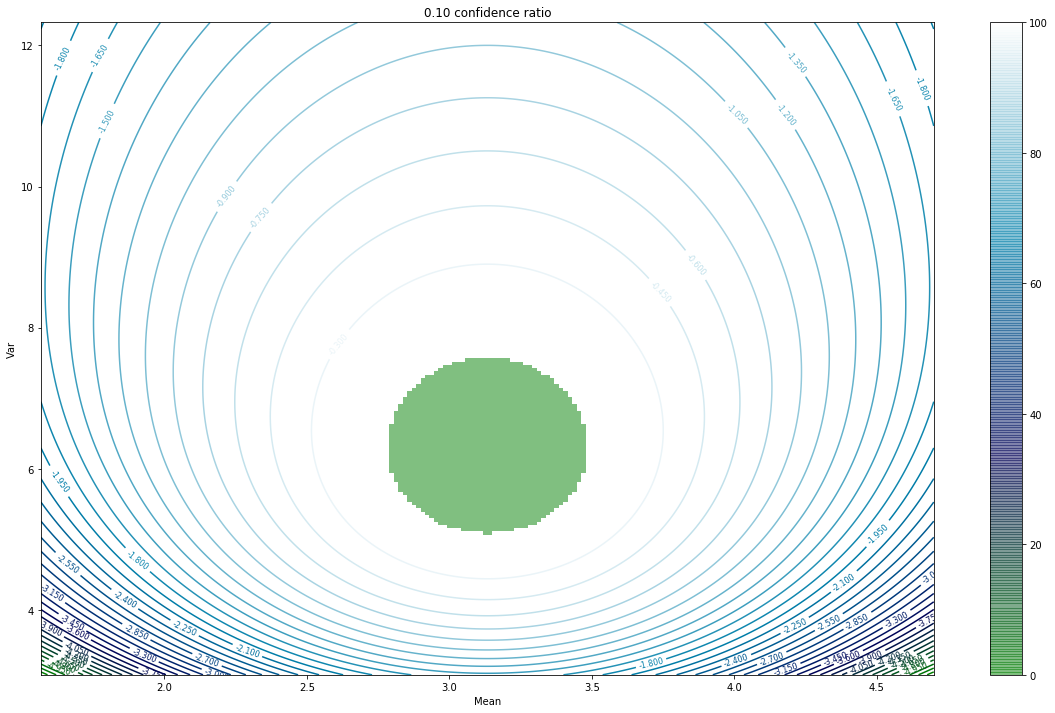

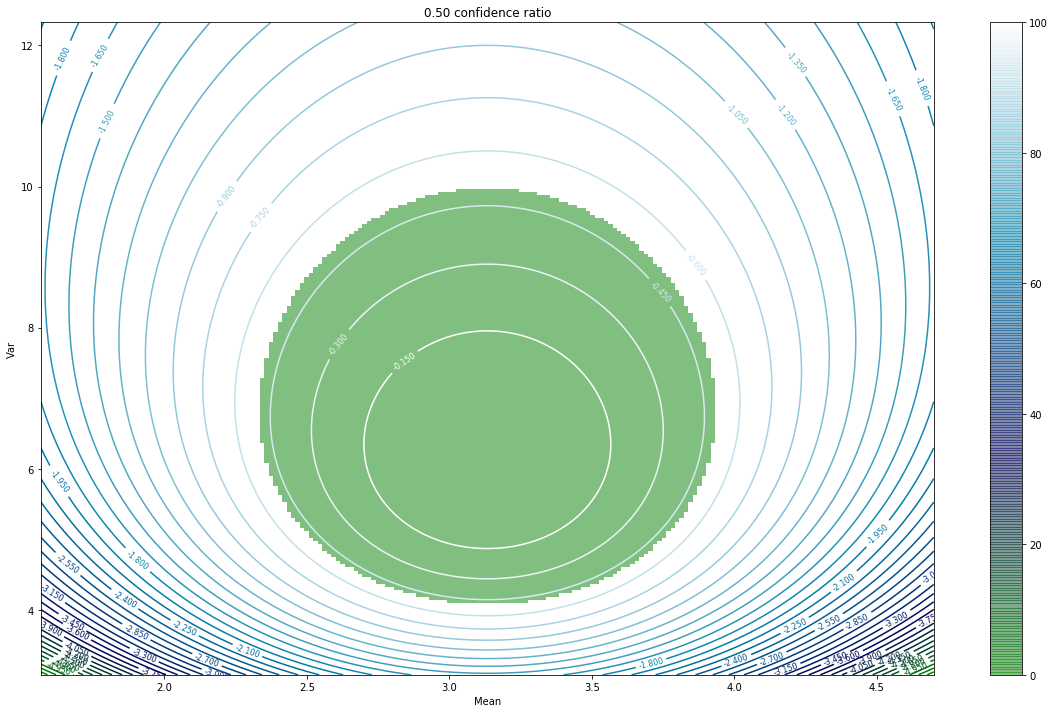

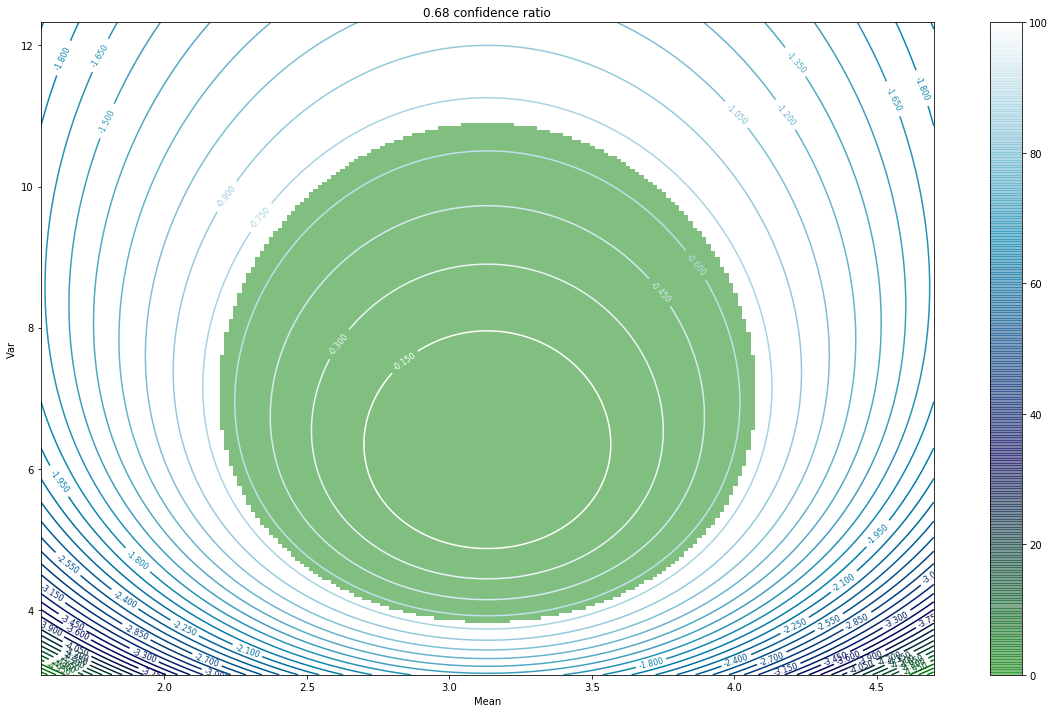

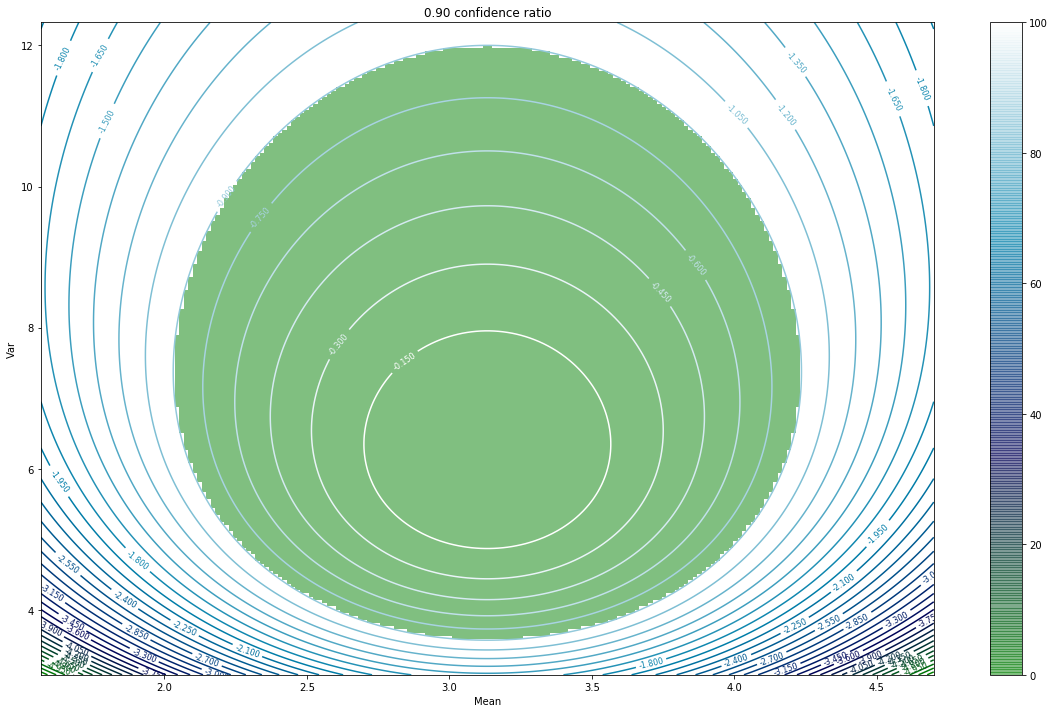

In [5]:
confidence_ratios = [0.1, 0.5, 0.68, 0.9]
for i in range(4):
    plt.figure(figsize=(20,12))
    contours = plt.contour(mu_s, sigmas, log_likelihoods, 50, extend='both', cmap='ocean')
    plt.clabel(contours, inline=True, fontsize=8)
    plt.imshow(100 * (log_likelihoods < -confidence_ratios[i]), 
           extent=[mu_fit / 2, 3 * mu_fit / 2, sigma_fit ** 2 / 2, 2 * (sigma_fit ** 2)], 
           aspect='auto', origin='lower', alpha=0.5, cmap='ocean')
    plt.colorbar()
    plt.title("%.2f confidence ratio" % confidence_ratios[i])
    plt.xlabel("Mean")
    plt.ylabel("Var")
    plt.show()

2. Постройте оценку маскимального правдоподобия $\hat{\sigma}^2$ для $\sigma_\mu$ при фиксированном $\mu$ (без учёта полученных измерений), подставьте в функцию правдоподобия, выпишите выражение для профильного правдоподобия. Постройте график зависимости от $\mu$.

$$ ln (L(\mu, \sigma^2)) = \frac{n}{2} ln\left(\frac{1}{2\pi\sigma^2}\right) - \frac{1}{2\sigma^2}\sum\limits_{i=1}^{n} (x_i - \mu)^2 = -\frac{n}{2}ln\sigma^2 - nln\sqrt{2\pi} - \frac{1}{2\sigma^2}\sum\limits_{i=1}^{n} (x_i - \mu)^2$$

$$ \frac{\partial ln L}{\partial \sigma^2} = -\frac{n}{2\sigma^2} + \frac{1}{2\sigma^4}\sum\limits_{i=1}^{n} (x_i - \mu)^2 $$

$$ \hat{\sigma}^2 = \frac{\sum\limits_{i=1}^{n} (x_i - \mu)^2}{n} $$

$$ L(\mu, \hat{\sigma}^2) = n^\frac{n}{2}\left(2\pi e \sum\limits_{i=1}^{n} (x_i - \mu)^2\right)^{-\frac{n}{2}}$$

$$ L_{\mu} = \max\limits_{\sigma}L(\mu, {\sigma}^2) $$

In [6]:
def profile_max_likelihood_estimation(X, mu):
    return np.log((len(X) / (2 * np.pi * np.e * np.sum((x - mu) ** 2))) ** (len(x) / 2))

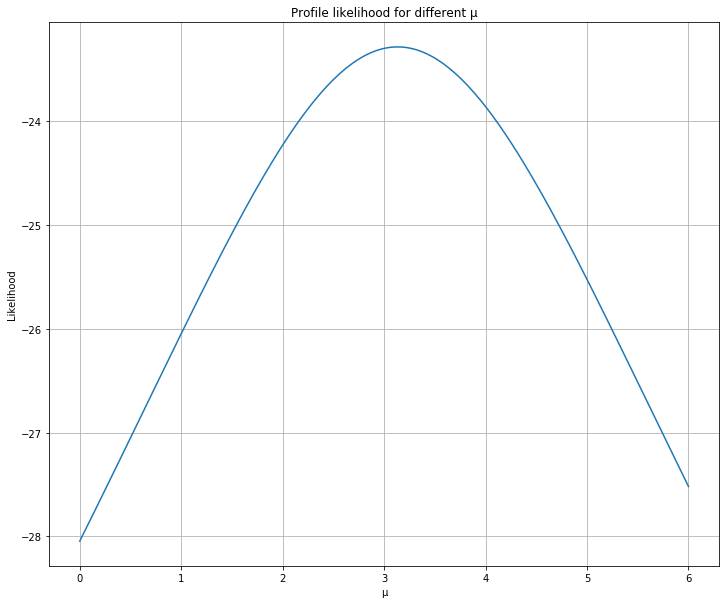

In [7]:
mu_s = np.linspace(0, 6, 200)
profiles_mle = [profile_max_likelihood_estimation(x, mu) for mu in mu_s]

plt.figure(figsize=(12, 10))
plt.plot(mu_s, profiles_mle)
plt.grid()
plt.title("Profile likelihood for different µ")
plt.xlabel("µ")
plt.ylabel("Likelihood");

3. На том же графике постройте график зависимости от $\mu$ оценочной функции правдоподобия $L(\mu, \sigma^2 = \hat{\sigma}^2)$ для выборочной оценки дисперсии $\hat{\sigma}^2$ и функции правдоподобия $L(\mu, \sigma^2 = 1)$. Для всех трех функций правдоподобия постройте 68% доверительный интервал. Сделайте вывод о покрытии путем анализа 100 случайных выборок $N(3, 6)$ .

In [8]:
def profile_sample_var_estimation(x, mu):
    s2 = np.var(x)
    return np.log((2 * np.pi * s2) ** (-len(x) / 2) * np.exp(-np.sum((x - mu) ** 2) / (2 * s2)))

def profile_one_estimation(x, mu):
    return np.log((2 * np.pi) ** (-len(x) / 2) * np.exp(-np.sum((x - mu) ** 2) / 2))

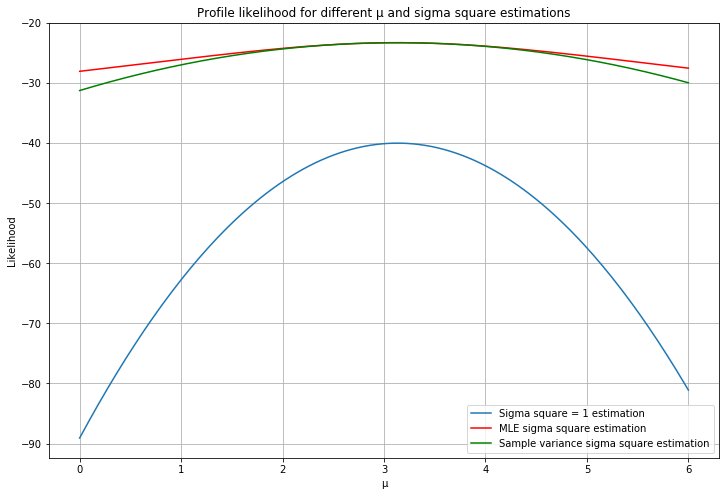

In [9]:
profiles_sample_var = [profile_sample_var_estimation(x, mu) for mu in mu_s]
profiles_one = [profile_one_estimation(x, mu) for mu in mu_s]
plt.figure(figsize=(12, 8))
plt.plot(mu_s, profiles_one, label='Sigma square = 1 estimation')
plt.plot(mu_s, profiles_mle, label='MLE sigma square estimation', color='red')
plt.plot(mu_s, profiles_sample_var, label='Sample variance sigma square estimation', color='green')
plt.grid()
plt.title("Profile likelihood for different µ and sigma square estimations")
plt.xlabel("µ")
plt.ylabel("Likelihood")
plt.legend()
plt.show()

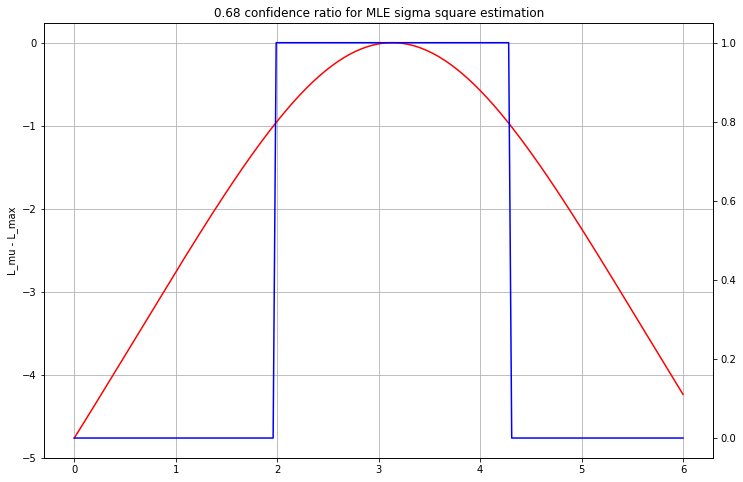

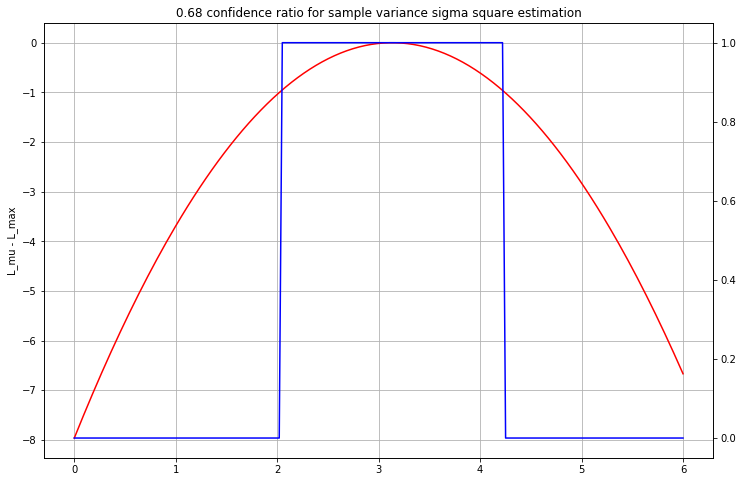

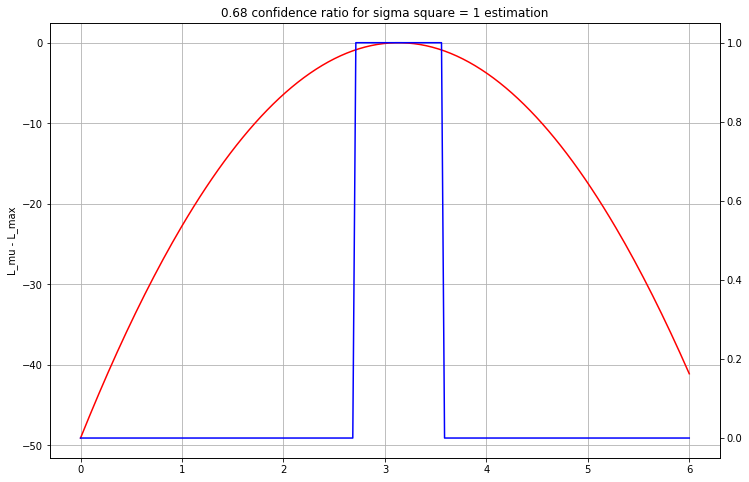

In [10]:
confidence_ratio = chi2.ppf(q=0.68, df=1)

plt.figure(figsize=(12, 8))
plt.ylabel('L_mu - L_max')
plt.plot(mu_s, profiles_mle - np.max(profiles_mle), color='red')
plt.grid()
plt.twinx()
plt.plot(mu_s, profiles_mle - np.max(profiles_mle) > -confidence_ratio, color='blue')
plt.title("0.68 confidence ratio for MLE sigma square estimation")
plt.show()

plt.figure(figsize=(12, 8))
plt.ylabel('L_mu - L_max')
plt.plot(mu_s, profiles_sample_var - np.max(profiles_sample_var), color='red')
plt.grid()
plt.twinx()
plt.plot(mu_s, profiles_sample_var - np.max(profiles_sample_var) > -confidence_ratio, color='blue')
plt.title("0.68 confidence ratio for sample variance sigma square estimation")
plt.show()

plt.figure(figsize=(12, 8))
plt.ylabel('L_mu - L_max')
plt.plot(mu_s, profiles_one - np.max(profiles_one), color='red')
plt.grid()
plt.twinx()
plt.plot(mu_s, profiles_one - np.max(profiles_one) > -confidence_ratio, color='blue')
plt.title("0.68 confidence ratio for sigma square = 1 estimation")
plt.show()

In [11]:
samples = np.random.normal(3, np.sqrt(6), (100, 10))

mle_max = [
    np.max([profile_max_likelihood_estimation(X_i, mu) for mu in mu_s]) for X_i in samples
]
one_max = [
    np.max([profile_one_estimation(X_i, mu) for mu in mu_s]) for X_i in samples
]
sample_var_max = [
    np.max([profile_sample_var_estimation(X_i, mu) for mu in mu_s]) for X_i in samples
]


profiles_mle = [
    profile_max_likelihood_estimation(X_i, 3) - mle_max[i] > -confidence_ratio for i, X_i in enumerate(samples)
]
profsiles_one = [
    profile_one_estimation(X_i, 3) - one_max[i] > -confidence_ratio for i, X_i in enumerate(samples)
]
profiles_sample_var = [
    profile_sample_var_estimation(X_i, 3) - sample_var_max[i] > -confidence_ratio for i, X_i in enumerate(samples)
]

print(np.sum(profiles_mle))
print(np.sum(profsiles_one))
print(np.sum(profiles_sample_var))

100
41
80


**Во втором случае недопокрытие.**

4. Выпишите профильное правдоподобие для $\sigma^2$. Известно, что для оценки выборочной дисперсии можно использовать: $s^2 = \frac{1}{n-1} \sum\limits_{i=1}^{n}(x_i - \overline{x})^2,$ про которую известно, что $(n-1)\frac{s^2}{\sigma^2} \sim \mathcal{X}^2_{n-1}$. Нарисуйте правдоподобие для $\sigma^2$ в этом случае. Сравните доверительные интервалы аналогично случаю $\mu$.

$$\frac{\partial lnL}{\partial\mu} = \frac{1}{\sigma^2} \sum\limits_{i=1}^{n}(X_i - \mu)$$

$$\hat{\mu} = \frac{1}{n}\sum\limits_{i=1}^{n}X_i$$

$$\overline{X} = \hat{\mu}$$

$$L(\hat{\mu}, \sigma^2) = \frac{1}{(2\pi\sigma^2)^{\frac{n}{2}}}exp\left(-\frac{\sum\limits_{i=1}^{n}(X_i - \overline{X})^2}{2\sigma^2}\right)$$

$$ L_{\sigma^2} = \max L(\mu, {\sigma}^2) $$

In [12]:
def profile_mle(x, sigma):
    return np.log(((2 * np.pi * sigma) ** (-len(x) / 2)) * np.exp(-np.sum((x - np.mean(x)) ** 2) / (2 * sigma)))

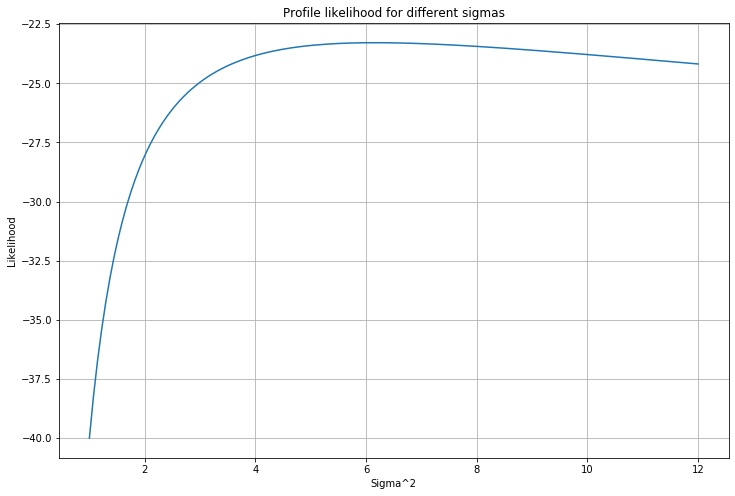

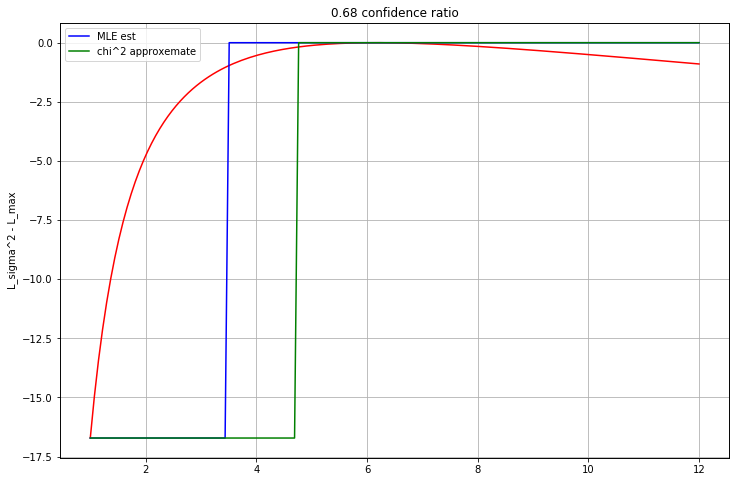

In [13]:
sigmas = np.linspace(1, 12, 150)
profiles_mle = [profile_mle(x, sigma) for sigma in sigmas]
plt.figure(figsize=(12, 8))
plt.plot(sigmas, profiles_mle)
plt.grid()
plt.title("Profile likelihood for different sigmas")
plt.xlabel('Sigma^2')
plt.ylabel("Likelihood")
plt.show()

sigma2 = np.var(x, ddof=1)
conf_ratio1 = chi2.ppf((1 + 0.68) / 2, len(x) - 1)
conf_ratio2 = chi2.ppf((1 - 0.68) / 2, len(x) - 1)
conf_ratio_int1 = (len(x) - 1) * sigma2 / conf_ratio1
conf_ratio_int2 =  (len(x) - 1) * sigma2 / conf_ratio2

plt.figure(figsize=(12, 8))
plt.plot(sigmas, profiles_mle - np.max(profiles_mle), color='red')
plt.ylabel('L_sigma^2 - L_max')
plt.grid()
plt.twinx()
plt.plot(sigmas, profiles_mle - np.max(profiles_mle) > -confidence_ratio, color='blue', label='MLE est')
plt.plot(sigmas, (sigmas >= conf_ratio_int1) & (sigmas <= conf_ratio_int2), color='green', label='chi^2 approxemate')
plt.grid()
plt.yticks([])
plt.legend()
plt.title("0.68 confidence ratio")
plt.show()

In [14]:
samples = np.random.normal(3, np.sqrt(6), (100, 10))

max_mle = [np.max([profile_mle(X_i, sigma) for sigma in sigmas]) for X_i in samples]

profiles_mle = [
    profile_mle(X_i, 6) - max_mle[i] > -confidence_ratio for i, X_i in enumerate(samples)
]

profiles_chi2 = [
    (6 >= (len(x) - 1) * np.var(X_i, ddof=1) / conf_ratio1) & (6 <= (len(x) - 1) * np.var(X_i, ddof=1) / conf_ratio2)
    for i, X_i in enumerate(samples)
    ]
print(np.sum(profiles_mle)) 
print(np.sum(profiles_chi2))

78
67


**Есть небольшое недопокрытие.**

## Задание 2

Наблюдаемый самолёт характеризуется расстоянием до наблюдателя, r, и углом наблюдения, θ. Пусть есть m измерений R и Θ, найдите дисперсию высоты самолёта, вычисляемую по формуле Y = R sin Θ, считая что $\sigma_R$ и $\sigma_{\theta}$ известны. Если R фиксирована, когда достигается максимальная дисперсия Y?

$$V = \frac{1}{m} \sum \limits_{i=1}^m \bigg(R_isin(\theta_i) - \frac{1}{m}\sum_j^m{R_isin(\theta_j)}\bigg)^2$$

$$\frac{1}{m} \sum \limits_{i=1}^m \bigg(R_isin(\theta_i) - \frac{1}{m}\sum_j^m{R_isin(\theta_j)}\bigg)^2 \rightarrow max$$
$$\Leftrightarrow$$
$$\sum \limits_{i=1}^m \bigg(sin(\theta_i) - \frac{1}{m}\sum_j^m{sin(\theta_j)}\bigg)^2 \rightarrow max \space(т. \space к. \space R \space фиксирован)$$

Тогда дисперсия будет максимальная. Считаем производную по $\theta_j$. Среднее = M, $M'_{\theta_j} = \frac{1}{m}$

$$2\sum \limits_{i=1}^m \bigg(sin(\theta_i) - M\bigg) \cdot \bigg(cos(\theta_j) \cdot I\{i = j\} - \frac1m\bigg) = 0$$

$$\frac1m\sum \limits_{i=1, i \neq j}^m \bigg(M - sin(\theta_i)\bigg) + (sin(\theta_j) - M)\cdot(cos{\theta_j} - \frac1m) = $$
$$\frac{m-1}{m}M-\frac1m\sum \limits_{i=1, i \neq j}^m \bigg(sin(\theta_i)\bigg) + sin(\theta_j)\cdot cos(\theta_j) - Mcos(\theta_j) - \frac1m sin(\theta_j) + \frac Mm$$

$$\frac{m-1}{m}M-M + sin(\theta_j)\cdot cos(\theta_j) - Mcos(\theta_j) + \frac Mm = 0$$ $$\Leftrightarrow$$
$$sin(\theta_j) \cdot cos(\theta_j) - Mcos(\theta_j)= 0$$
$$\Leftrightarrow$$
$$cos(\theta_j) \cdot (sin(\theta_j) - M) = 0$$

То есть $cos\theta_j = 0$, откуда max $\theta_j = \dfrac\pi 2 + \pi k$, т. к. если $sin\theta_j=M$, тогда среднее отклонение будет 0

## Задание 3

Для случайной величины X ∼ N (µ, $\sigma^2$) и функции g(x) = exp(x) / (1 + exp(x)):

1. При фикисрованном $\sigma^2$ = 1, найдите оценку для среднего и дисперсии g(x) с помощью Дельта-метода в зависимости от µ. Постройте график зависимости оценок от µ.

Из лекций:

$$E(g(X)) \approx g(\mu)$$
$$Var_\mu(g(X)) \approx (g'(\mu))^2 Var_\mu(X)$$

Т. к. $g(x) = \frac{e^x}{1+e^x} \text{ и } Var_\mu X = 1 \rightarrow$
$$Var_\mu(g(X)) = (\frac{e^\mu}{(1+e^\mu})^2)^2$$
$$E(g(X)) = \frac{e^\mu}{1+e^\mu}$$

In [15]:
def g(x):
    return np.exp(x) / (1 + np.exp(x))

def derivative_g(x):
    return (np.exp(x) / (1 + np.exp(x)) ** 2) ** 2

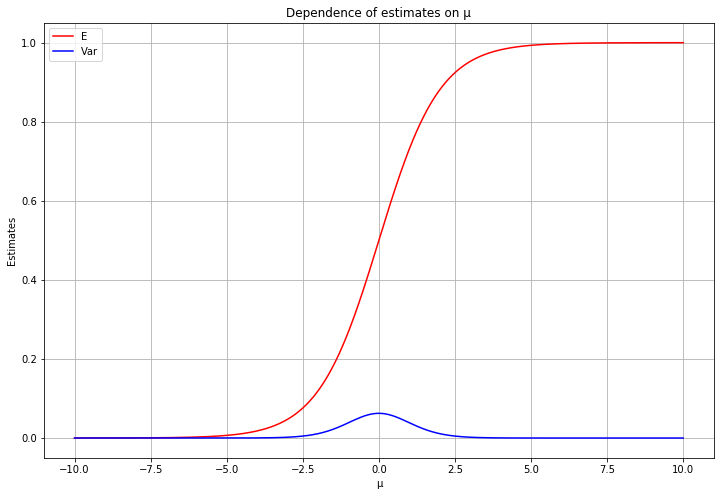

In [16]:
mu = np.linspace(-10, 10, 1000)
x = [x_i for x_i in mu]
mean = [g(x_i) for x_i in mu]
var = [derivative_g(x_i) for x_i in mu]

plt.figure(figsize=(12, 8))
plt.grid()
plt.plot(x, mean, color='red', label='E')
plt.plot(x, var, color='blue', label='Var')
plt.title('Dependence of estimates on µ')
plt.xlabel('µ')
plt.ylabel('Estimates')
plt.legend()
plt.show()

2. Получите точные оценки на среднее и дисперсию для нескольких µ, семплировав из соответствующего нормального распределения, а затем преобразовывая согласно g(x). Поставьте полученные точки на график. Сделайте вывод, в каких местах Дельта-метод дают оценку, хорошо приближающую точную оценку. Ответ иллюстрируйте графиком g''(x).

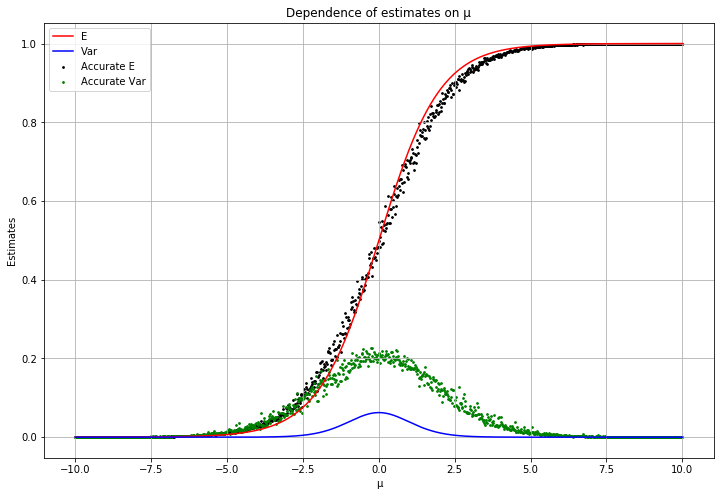

In [17]:
avs = [norm.fit(g(norm.rvs(loc = i, scale = 1, size = 100))) for i in mu]
    
plt.figure(figsize=(12, 8))
plt.grid()
plt.plot(x, mean, color='red', label='E')
plt.plot(x, var, color='blue', label='Var')
plt.scatter(mu, [av[0] for av in avs], s=3, color='black', label='Accurate E')
plt.scatter(mu, [d[1] for d in avs], s=3, color='green', label='Accurate Var')
plt.title('Dependence of estimates on µ')
plt.xlabel('µ')
plt.ylabel('Estimates')
plt.legend()
plt.show()

In [18]:
def second_derivative_g(x):
    return np.exp(x) * (2 * np.exp(2 * x) / (1 + np.exp(x)) ** 3 - \
                        np.exp(x) / (1 + np.exp(x)) ** 2) + \
                        np.exp(x) / (1 + np.exp(x)) - \
                        2 * np.exp(2 * x) / (1 + np.exp(x)) ** 2

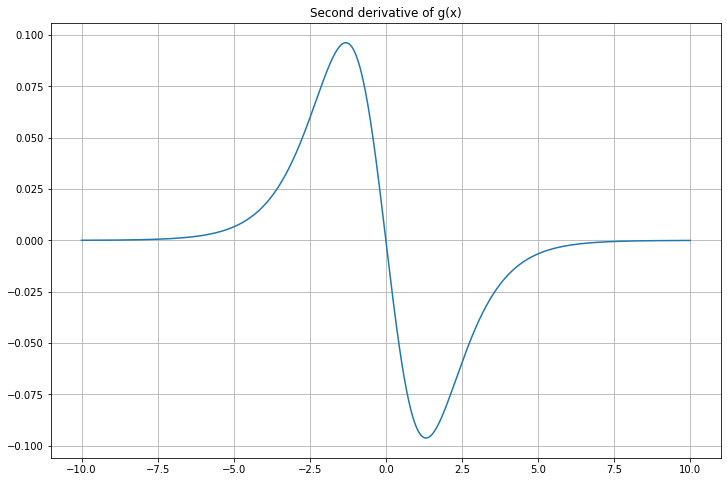

In [19]:
y = [second_derivative_g(x_i) for x_i in mu]

plt.figure(figsize=(12, 8))
plt.grid()
plt.plot(x, y)
plt.title('Second derivative of g(x)')
plt.show()

3. Проделайте предыдущие пункты для фиксированного µ = 1, варьируя $\sigma^2$
